In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.image as mpimg
import geopandas as gpd
import os
import folium
from folium.plugins import MarkerCluster
from folium import plugins
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.linear_model import RidgeClassifier
from sklearn.decomposition import PCA
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import classification_report
import xgboost as xgb
from sklearn.metrics import precision_score, recall_score

In [12]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
stats = pd.read_csv('C:\\Users\\jayma\\Desktop\\614Project\\airbnb.csv')
stats = stats.dropna()

stats.shape

(38821, 16)

In [16]:
stats.shape

(38821, 16)

In [15]:
stats.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


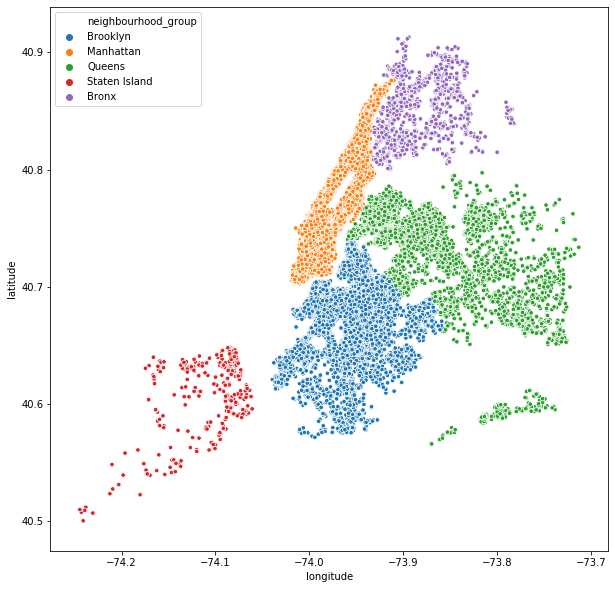

In [4]:
#Review the listings by boroname
plt.figure(figsize=(10,10))
sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group',s=20, data=stats)

In [8]:
#Get a count by borough
borough_count = stats.groupby('neighbourhood_group').agg('count').reset_index()

In [9]:
nyc = gpd.read_file(gpd.datasets.get_path('nybb'))


In [10]:
nyc.head(5)

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


In [11]:
borough_count = stats.groupby('neighbourhood_group').agg('count').reset_index()

In [12]:
nyc = gpd.read_file(gpd.datasets.get_path('nybb'))
nyc.head(5)

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


In [18]:
#Get a count by borough
borough_count = stats.groupby('neighbourhood_group').agg('count').reset_index()

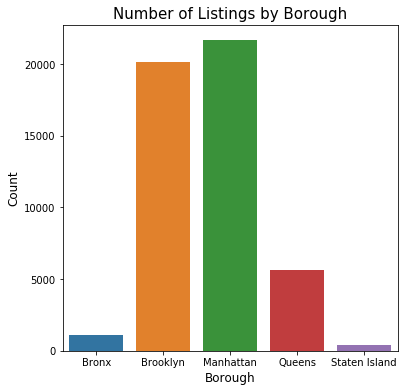

In [19]:
#Plot the count by borough
fig, ax1 = plt.subplots(1,1, figsize=(6,6)
                       )
sns.barplot(x='neighbourhood_group', y='id', data=borough_count, ax=ax1)

ax1.set_title('Number of Listings by Borough', fontsize=15)
ax1.set_xlabel('Borough', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)
ax1.tick_params(axis='both', labelsize=10)

In [20]:
nyc = gpd.read_file(gpd.datasets.get_path('nybb'))
nyc.head(5)

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


In [27]:
#Rename a column to accurately reflect Boroughs
stats.rename(columns={'neighbourhood_group':'boroname'}, inplace=True)

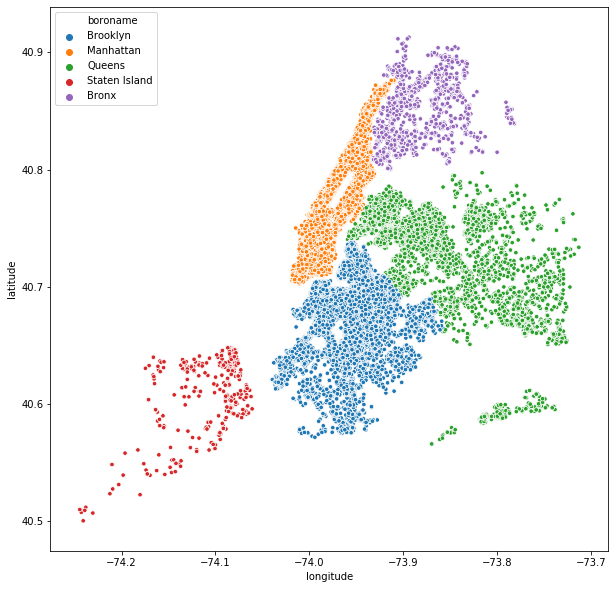

In [29]:
#Review the listings by boroname
plt.figure(figsize=(10,10))
sns.scatterplot(x='longitude', y='latitude', hue='boroname',s=20, data=stats)

In [31]:
#Get a count by borough
borough_count = stats.groupby('boroname').agg('count').reset_index()

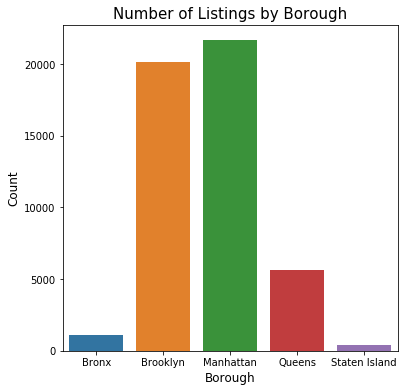

In [32]:
#Plot the count by borough
fig, ax1 = plt.subplots(1,1, figsize=(6,6)
                       )
sns.barplot(x='boroname', y='id', data=borough_count, ax=ax1)

ax1.set_title('Number of Listings by Borough', fontsize=15)
ax1.set_xlabel('Borough', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)
ax1.tick_params(axis='both', labelsize=10)

In [33]:
#Here we are using geopandas to bring in a base layer of NYC boroughs
nyc = gpd.read_file(gpd.datasets.get_path('nybb'))
nyc.head(5)

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


In [34]:
nyc.rename(columns={'BoroName':'boroname'}, inplace=True)
bc_geo = nyc.merge(borough_count, on='boroname')

In [35]:
nyc.rename(columns={'BoroName':'boroname'}, inplace=True)
bc_geo = nyc.merge(borough_count, on='boroname')

In [37]:
from shapely import wkt

In [122]:
conda install -c conda-forge folium

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\jayma\Anaconda3

  added / updated specs:
    - folium


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-3.2.0               |           py37_0         749 KB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    certifi-2019.9.11          |           py37_0         147 KB  conda-forge
    conda-4.7.12               |           py37_0         3.0 MB  conda-forge
    folium-0.10.0              |             py_0          59 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         4.0 MB

The following NEW packages will be INSTALLED:

  altair             conda-forge/win-64::altair-3.2.0-py37_

In [39]:
conda install descartes

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\jayma\Anaconda3

  added / updated specs:
    - descartes


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.10.16 |                0         163 KB
    certifi-2019.9.11          |           py37_0         155 KB
    conda-4.7.12               |           py37_0         3.0 MB
    descartes-1.1.0            |             py_3           9 KB
    openssl-1.1.1d             |       he774522_3         5.7 MB
    ------------------------------------------------------------
                                           Total:         9.1 MB

The following NEW packages will be INSTALLED:

  descartes          pkgs/main/noarch::descartes-1.1.0-py_3

The following packages will be UPDATED:

  ca-certificates    conda-forge::ca-certificates-2019.9.1~ --> pkgs/main::ca-certificates-2019.1

(905464.7390380859, 1075092.8783935546, 112485.76063504723, 280480.4142594267)

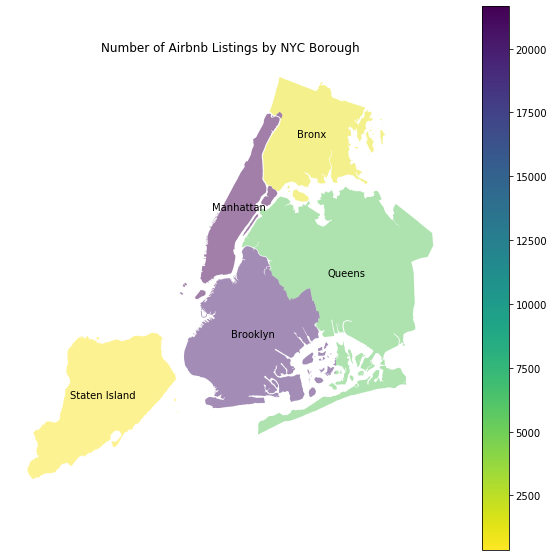

In [40]:
fig,ax = plt.subplots(1,1, figsize=(10,10))
bc_geo.plot(column='id', cmap='viridis_r', alpha=.5, ax=ax, legend=True)
bc_geo.apply(lambda x: ax.annotate(s=x.boroname, color='black', xy=x.geometry.centroid.coords[0],ha='center'), axis=1)
plt.title("Listings by Airbnb in NYC")
plt.axis('off')

In [42]:
stats.head()

,id,name,host_id,host_name,boroname,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [45]:
from scipy.stats import norm
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score

In [52]:
stats.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Text(0.5, 1.0, 'Price vs Room Type')

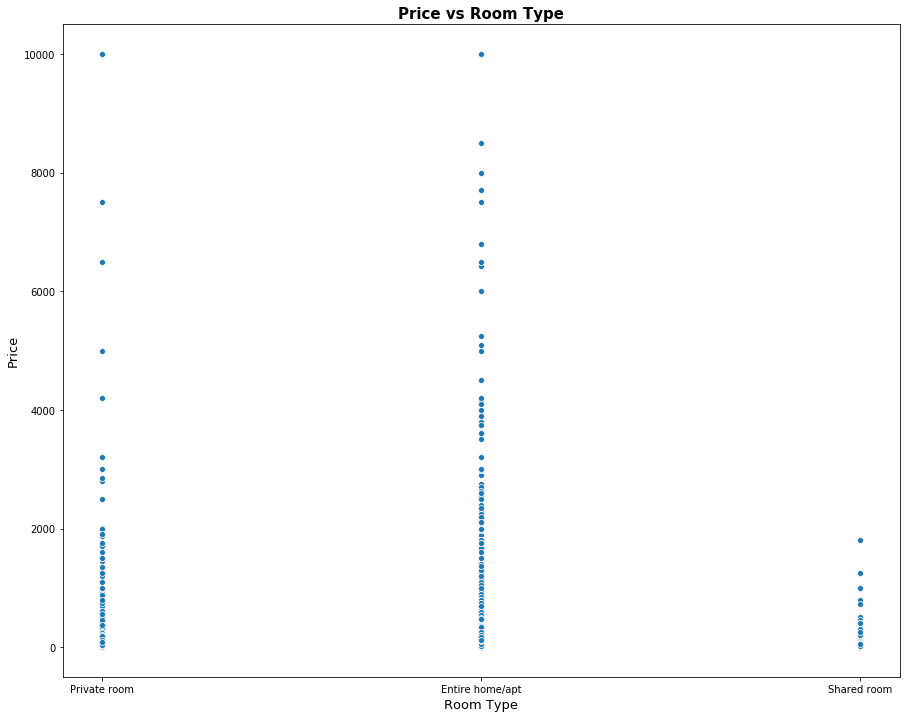

In [54]:
plt.figure(figsize=(15,12))
sns.scatterplot(x='room_type', y='price', data=stats)

plt.xlabel("Room Type", size=13)
plt.ylabel("Price", size=13)
plt.title("Price vs Room Type",size=15, weight='bold')

Text(0.5, 1.0, ' Price vs Room Type vs Location')

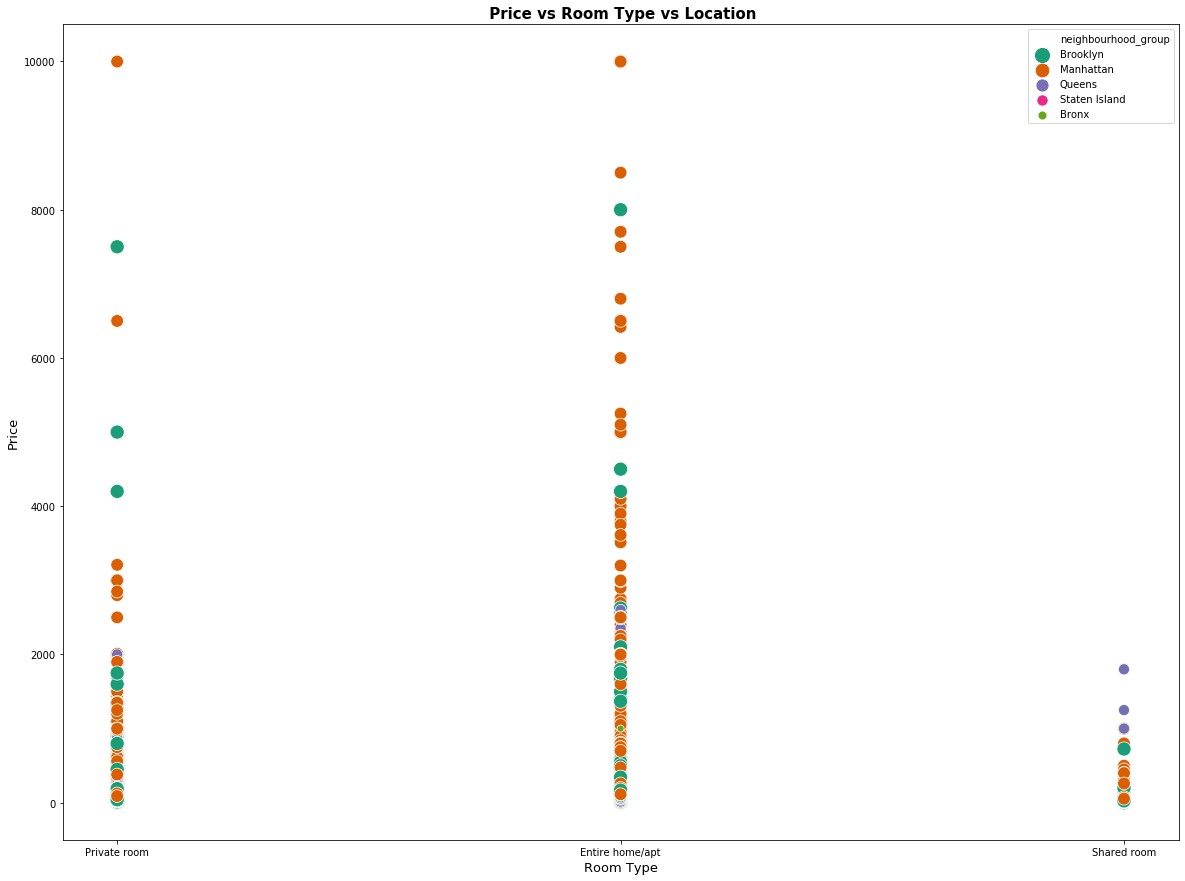

In [56]:
plt.figure(figsize=(20,15))
sns.scatterplot(x="room_type", y="price",
            hue="neighbourhood_group", size="neighbourhood_group",
            sizes=(50, 200), palette="Dark2", data=stats)

plt.xlabel("Room Type", size=13)
plt.ylabel("Price", size=13)
plt.title(" Price vs Room Type vs Location",size=15, weight='bold')

Text(0.5, 1, 'Correlation Matrix')

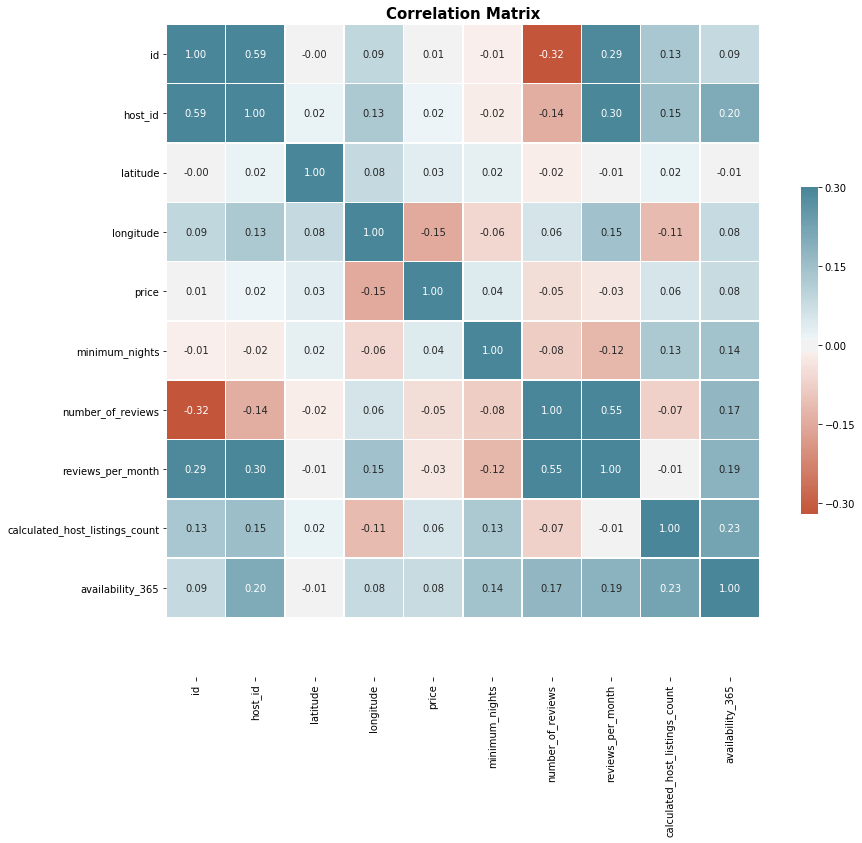

In [58]:
plt.figure(figsize=(15,12))
palette = sns.diverging_palette(20, 220, n=256)
corr=stats.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt=".2f", cmap=palette, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).set(ylim=(11, 0))
plt.title("Correlation Matrix",size=15, weight='bold')

In [69]:
nyc_model = stats.drop(columns=['name','id' ,'host_id','host_name', 
                                   'last_review','price'])
nyc_model.isnull().sum()

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [70]:
mean = nyc_model['reviews_per_month'].mean()
nyc_model['reviews_per_month'].fillna(mean, inplace=True)
nyc_model.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [71]:
nyc_model_x, nyc_model_y = nyc_model.iloc[:,:-1], nyc_model.iloc[:,-1]

In [73]:
multicollinearity, V=np.linalg.eig(corr)
multicollinearity

array([1.98268233, 1.66014587, 0.21004657, 0.42046467, 1.33887372,
       0.63647296, 1.07223087, 1.00582587, 0.80647968, 0.86677746])

In [75]:
X_train, X_test, y_train, y_test = train_test_split(nyc_model_x, nyc_model_y, test_size=0.3,random_state=42)

Text(0.5, 1.0, 'Price vs Number of Reviews vs Neighbourhood Group')

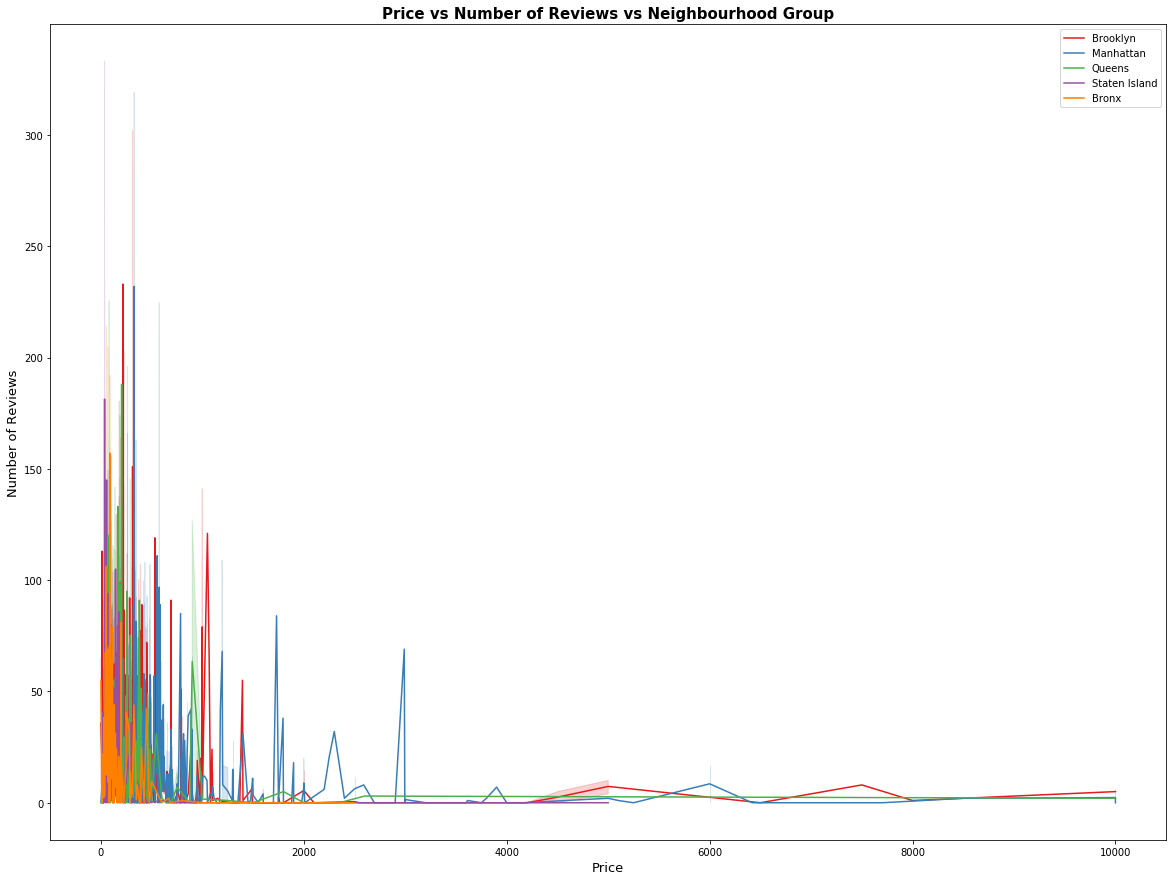

In [82]:
plt.figure(figsize=(20,15))
sns.set_palette("Set1")

sns.lineplot(x='price', y='number_of_reviews', 
             data=nyc_data[nyc_data['neighbourhood_group']=='Brooklyn'],
             label='Brooklyn')
sns.lineplot(x='price', y='number_of_reviews', 
             data=nyc_data[nyc_data['neighbourhood_group']=='Manhattan'],
             label='Manhattan')
sns.lineplot(x='price', y='number_of_reviews', 
             data=nyc_data[nyc_data['neighbourhood_group']=='Queens'],
             label='Queens')
sns.lineplot(x='price', y='number_of_reviews', 
             data=nyc_data[nyc_data['neighbourhood_group']=='Staten Island'],
             label='Staten Island')
sns.lineplot(x='price', y='number_of_reviews', 
             data=nyc_data[nyc_data['neighbourhood_group']=='Bronx'],
             label='Bronx')
plt.xlabel("Price", size=13)
plt.ylabel("Number of Reviews", size=13)
plt.title("Price vs Number of Reviews vs Neighbourhood Group",size=15, weight='bold')

In [83]:
nyc_data['neighbourhood_group']= nyc_data['neighbourhood_group'].astype("category").cat.codes
nyc_data['neighbourhood'] = nyc_data['neighbourhood'].astype("category").cat.codes
nyc_data['room_type'] = nyc_data['room_type'].astype("category").cat.codes
nyc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null int8
neighbourhood                     48895 non-null int16
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null int8
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64
dtyp

In [84]:
nyc_data['price_log'] = np.log(nyc_data.price+1)

In [86]:
mean = nyc_model['reviews_per_month'].mean()
nyc_model['reviews_per_month'].fillna(mean, inplace=True)
nyc_model.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
price_log                         0
dtype: int64

In [87]:
nyc_model_x, nyc_model_y = nyc_model.iloc[:,:-1], nyc_model.iloc[:,-1]

In [89]:
multicollinearity, V=np.linalg.eig(corr)
multicollinearity

array([1.98268233, 1.66014587, 0.21004657, 0.42046467, 1.33887372,
       0.63647296, 1.07223087, 1.00582587, 0.80647968, 0.86677746])

In [90]:
scaler = StandardScaler()
nyc_model_x = scaler.fit_transform(nyc_model_x)

In [91]:
X_train, X_test, y_train, y_test = train_test_split(nyc_model_x, nyc_model_y, test_size=0.3,random_state=42)

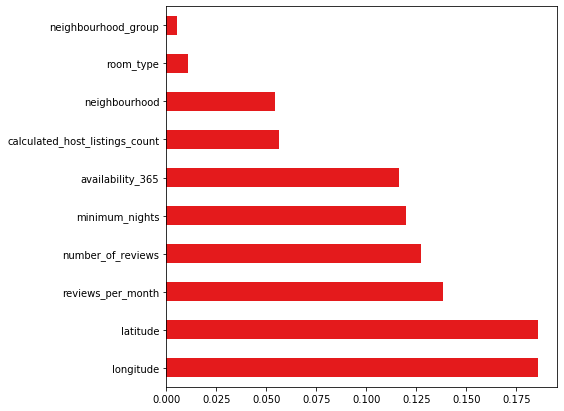

In [92]:
lab_enc = preprocessing.LabelEncoder()

feature_model = ExtraTreesClassifier(n_estimators=50)
feature_model.fit(X_train,lab_enc.fit_transform(y_train))

plt.figure(figsize=(7,7))
feat_importances = pd.Series(feature_model.feature_importances_, index=nyc_model.iloc[:,:-1].columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [3]:
kfold_cv=KFold(n_splits=5, random_state=42, shuffle=False)
for train_index, test_index in kfold_cv.split(nyc_model_x,nyc_model_y):
    X_train, X_test = nyc_model_x[train_index], nyc_model_x[test_index]
    y_train, y_test = nyc_model_y[train_index], nyc_model_y[test_index]

NameError: name 'KFold' is not defined

In [94]:
Poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train = Poly.fit_transform(X_train)
X_test = Poly.fit_transform(X_test)

In [95]:
lr = LinearRegression(copy_X= True, fit_intercept = True, normalize = True)
lr.fit(X_train, y_train)
lr_pred= lr.predict(X_test)

In [98]:
scaler = StandardScaler()
nyc_model_xx = scaler.fit_transform(nyc_model_xx)

In [99]:
kfold_cv=KFold(n_splits=4, random_state=42, shuffle=False)
for train_index, test_index in kfold_cv.split(nyc_model_xx,nyc_model_yx):
    X_train_x, X_test_x = nyc_model_xx[train_index], nyc_model_xx[test_index]
    y_train_x, y_test_x = nyc_model_yx[train_index], nyc_model_yx[test_index]

In [100]:
Poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_x = Poly.fit_transform(X_train_x)
X_test_x = Poly.fit_transform(X_test_x)

In [101]:
lr_x = LinearRegression(copy_X= True, fit_intercept = True, normalize = True)
lr_x.fit(X_train_x, y_train_x)
lr_pred_x= lr_x.predict(X_test_x)

In [102]:
print('********Lineer Regression Model**********')

print('--Phase-1--')
print('MAE: %f'% mean_absolute_error(y_test, lr_pred))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, lr_pred)))   
print('R2 %f' % r2_score(y_test, lr_pred))

print('--Phase-2--')
print('MAE: %f'% mean_absolute_error(y_test_x, lr_pred_x))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test_x, lr_pred_x)))   
print('R2 %f' % r2_score(y_test_x, lr_pred_x))

********Lineer Regression Model**********
--Phase-1--
MAE: 0.377923
RMSE: 0.522021
R2 0.527663
--Phase-2--
MAE: 0.531963
RMSE: 0.685894
R2 0.184227


In [118]:
stats1=stats.sort_values(by=['number_of_reviews'],ascending=False).head(1000)

In [119]:
stats2=stats.sort_values(by=['price'],ascending=False).head(1000)

In [129]:
print('\t\t\t\t\tRooms with the most reviews')
Long=-73.80
Lat=40.80
mapdf1=folium.Map([Lat,Long],zoom_start=10,)

mapdf1_rooms_map=plugins.MarkerCluster().add_to(mapdf1)

for lat,lon,label in zip(stats1.latitude,stats1.longitude,stats1.name):
    folium.Marker(location=[lat,lon],icon=folium.Icon(icon='home'),popup=label).add_to(mapdf1_rooms_map)
mapdf1.add_child(mapdf1_rooms_map)

mapdf1

					Rooms with the most reviews


In [13]:
from sklearn import preprocessing
columns = ['neighbourhood_group', 'neighbourhood', 'room_type']

for x in columns: 
  le = preprocessing.LabelEncoder()
  le.fit(stats[x])
  stats[x] =le.transform(stats[x])

stats.sort_values(by='price',ascending=True,inplace=True)

stats.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
23161,18750597,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Kimberly,1,13,40.69023,-73.95428,1,0,4,1,2018-01-06,0.05,4,28
25433,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,0,62,40.83296,-73.88668,1,0,2,55,2019-06-24,2.56,4,127
25634,20523843,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,Martial Loft,1,28,40.69467,-73.92433,1,0,2,16,2019-05-18,0.71,5,0
25753,20608117,"Sunny, Quiet Room in Greenpoint",1641537,Lauren,1,90,40.72462,-73.94072,1,0,2,12,2017-10-27,0.53,2,0
25778,20624541,Modern apartment in the heart of Williamsburg,10132166,Aymeric,1,212,40.70838,-73.94645,0,0,5,3,2018-01-02,0.15,1,73


In [14]:
stats = pd.read_csv('C:\\Users\\jayma\\Desktop\\614Project\\airbnb.csv')
stats = stats.dropna()

In [15]:
stats1 = stats.drop(columns = ['id','name','host_name','last_review'],axis =1)

In [16]:
onehotdf = stats1.copy()

features = ['host_id','neighbourhood_group','neighbourhood','latitude','longitude','room_type','price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']

train = onehotdf[features]
categorical = train.select_dtypes(exclude = 'number')
numbers = train.select_dtypes(include= 'number')
onehotcategorical = pd.get_dummies(categorical)

train1 = pd.concat([onehotcategorical, numbers], sort = True, axis = 1)

y = train1['price']
x = train1.drop(columns = ['price'], axis=1)

In [17]:
from sklearn.preprocessing import StandardScaler

In [19]:
from sklearn import model_selection
x = StandardScaler().fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 0)

NameError: name 'train_test_split' is not defined

In [10]:
####################################
# Random Forest Regressor
####################################

from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100,max_depth = 8)
rf_model = rf_model.fit(x_train,y_train)

y_predictions = rf_model.predict(x_test)

NameError: name 'x_train' is not defined

In [86]:
from sklearn import metrics
from math import sqrt
from sklearn.metrics import mean_squared_error

RMSE = sqrt(mean_squared_error(y_test, y_predictions))

print(RMSE)

158.27430850384042


In [71]:
####################################
# Decision Tree Regressor
####################################

from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor()
dt_model = dt_model.fit(x_train, y_train)
y_pred = dt_model.predict(x_test)

In [72]:
RMSE1 = sqrt(mean_squared_error(y_test, y_pred))

print(RMSE1)

231.92814155704417


In [87]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression

In [117]:
lm = LinearRegression()

In [118]:
lm = lm.fit(x_train, y_train)
y_predict = lm.predict(x_test)

In [119]:
y_test = np.array(y_test)

In [127]:
RMSE2 = np.sum((y_test - y_predict)**2)/(y_test.shape[0])
            
print(RMSE2)

7.309194391573367e+29


In [133]:
#####################################
        # XGBoost or Gradient boosting
#####################################
from sklearn.ensemble import GradientBoostingRegressor

Gb_model = GradientBoostingRegressor(n_estimators = 50, max_depth = 6)
Gb_model = Gb_model.fit(x_train, y_train)
y_pre = Gb_model.predict(x_test)

In [134]:
RMSEXG = sqrt(mean_squared_error(y_test, y_pre))

print(RMSEXG)

157.95367694502227
